[View in Colaboratory](https://colab.research.google.com/github/crazy-lazy-life/Assignment-4/blob/crazy-lazy-life/Solution_to_First_Date_with_Tensorflow.ipynb)

First_Date_With_Tensorflow

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Let's define some tensors
t1 = tf.constant(2.0, dtype=tf.float32)
t2 = tf.constant([1.0, 2.0], dtype=tf.float32)
t3 = tf.constant([[[1.0, 9.0], [2.0, 3.0], [4.0, 5.0]], 
                  [[1.0, 9.0], [2.0, 3.0], [4.0, 5.0]]])
# Let's print them out!
print (t1)
print (t2)
print (t3)

sess = tf.Session()
print (sess.run(t1))
print ("=======================")
print (sess.run(t2))
print ("=======================")
print (sess.run(t3))
sess.close()

Tensor("Const:0", shape=(), dtype=float32)
Tensor("Const_1:0", shape=(2,), dtype=float32)
Tensor("Const_2:0", shape=(2, 3, 2), dtype=float32)
2.0
[1. 2.]
[[[1. 9.]
  [2. 3.]
  [4. 5.]]

 [[1. 9.]
  [2. 3.]
  [4. 5.]]]


Aaahaa!! Just printed those tensors!!!<br/>
Feels good! <br/>

For some of you, who are like, dude you got "No Theory Just Code" in bold <br/>
And you are still using the markdown cells for the theory ?!

I am just gonna say I am a unreasonable man.<br/>


So, you are programming with tf.<br/>
What ever you do is broken down to 2 basic steps:
- Building the computational Graph!
- Execute that graph using `session`!

That's all!

<hr/>

Let's compare this 2 steps with what we did above!<br/>
So, I defined 3 `tensor`s and these 3 `tensor`s formed my computational Graph.<br/>
And then I executed each tensor in this graph using a `session`.

That simple!

<hr/>

Now, let's define a few more computational graphs and execute them with sessions.

Okay, to start with let's build this computational graph!

![Comp Graph 1](https://raw.githubusercontent.com/iArunava/TensorFlow-NoteBooks/master/assets/comp_graph_1.jpg)

In [3]:
# Let's define the graph
comp_graph_1 = tf.multiply(tf.add(78, 19), 79)

# Alternatively
comp_graph_1_alt = (tf.constant(78) + tf.constant(19)) * tf.constant(79)

# Let's execute using session
sess = tf.Session()
print ('Comp Graph 1    : ', sess.run(comp_graph_1))
print ('Comp Graph 1 Alt: ', sess.run(comp_graph_1_alt))
sess.close()

Comp Graph 1    :  7663
Comp Graph 1 Alt:  7663


Let's define a sligtly more involved graph!

![alt text](https://raw.githubusercontent.com/iArunava/TensorFlow-NoteBooks/master/assets/comp_graph_2.jpg)

In [4]:
# Let build the graph
# We need to cast cause the tensors operated on should be of the same type
comp_graph_part_1 = tf.cast(tf.subtract(tf.add(7, 8), tf.add(9, 10)), 
                            dtype=tf.float32)
comp_graph_part_2 = tf.divide(tf.cast(tf.multiply(7, 10), dtype=tf.float32), tf.constant(19.5))
comp_graph_complete = tf.maximum(comp_graph_part_1, comp_graph_part_2)

# Let's execute
sess = tf.Session()
part1_res, part2_res, total_res = sess.run([comp_graph_part_1, comp_graph_part_2, comp_graph_complete])
print ('Complete Result: ', total_res)
print ('Part 1 Result: ', part1_res)
print ('Part 2 Result: ', part2_res)
sess.close()

Complete Result:  3.5897436
Part 1 Result:  -4.0
Part 2 Result:  3.5897436


Cool! Let's go! Build another graph and execute it with sessions.<br/>

But this time, it's all you!

Build this graph and execute it with `session`!

![alt text](https://raw.githubusercontent.com/iArunava/TensorFlow-NoteBooks/master/assets/comp_graph_3.jpg)

_Remember that `tensors` operated on should be of the same type!_<br/>
_Search up errors and other help you need on Google_

In [5]:
#Building the computational graph
node_1 = tf.constant([9, 10], dtype = tf.float32, name="leaf_node_1")
node_2 = tf.constant([7, 8.65], dtype = tf.float32, name="leaf_node_2")
node_3 = tf.constant([7.65, 9], dtype = tf.float32, name="leaf_node_3")
node_4 = tf.constant([13.5, 7.18], dtype = tf.float32, name="leaf_node_4")
node_5 = tf.constant(5.6, dtype = tf.float32, name="leaf_node_5")

cg1 = tf.multiply(node_1, node_2)
cg2 = tf.divide(cg1, node_5)
cg3 = tf.add(node_3, node_4)
cg4 = tf.minimum(cg2, cg3)

with tf.Session() as sess:
  print(sess.run(cg4))

[11.25     15.446429]


Let's do another!<br/>
It's fun! Isn't it?!

Build and execute this one!

![alt text](https://raw.githubusercontent.com/iArunava/TensorFlow-NoteBooks/master/assets/comp_graph_4.jpg)

In [6]:
#Building the computational graph
node_1 = tf.constant([[1.2,3.4],[7.5,8.6]], dtype = tf.float32, name="leaf_node_1")
node_2 = tf.constant([[7, 9],[8,6]], dtype = tf.float32, name="leaf_node_2")
node_3 = tf.constant([[2.79, 3.81, 5.6],[7.3, 5.67, 8.9]], dtype = tf.float32, name="leaf_node_3")
node_4 = tf.constant([[2.6, 18.1],[7.86, 9.81],[9.36, 10.11]], dtype = tf.float32, name="leaf_node_4")
node_4 = tf.transpose(node_4)

cg7 = tf.multiply(node_3, node_4)
cg8 = tf.reduce_mean(node_1, axis=1)
cg9 = tf.multiply(node_2, cg8)
cg10 = tf.reduce_sum(cg7)
cg11 = tf.add(cg9, cg10)

with tf.Session() as sess:
  print(sess.run(cg11))

[[383.4483  439.7983 ]
 [385.7483  415.64832]]


And a final one, before we move on to the next part!

![alt text](https://raw.githubusercontent.com/iArunava/TensorFlow-NoteBooks/master/assets/comp_graph_5.jpg)

In [7]:
#Building the computational graph
node_1 = tf.constant(7.0, dtype = tf.float32, name="leaf_node_1")
node_2 = tf.constant([[7.36, 8.91, 10.41],[5.31, 9.38, 7.99]], dtype = tf.float32, name="leaf_node_2")
node_3 = tf.constant([[7.99, 10.36],[5.36, 7.98],[8.91, 5.67]], dtype = tf.float32, name="leaf_node_3")
node_4 = tf.constant([[1, 5.6, 6.1, 8],[0, 0, 7.98, 9],[0, 0, 7.6, 7],[0, 0, 0, 8.98]], dtype = tf.float32, name = "leaf_node_4")
node_5 = tf.constant(19.6, dtype = tf.float32, name="leaf_node_5")

cg12 = tf.reduce_sum(tf.multiply(node_2, tf.transpose(node_3)))
cg13 = tf.add(cg12, node_1)
cg14 = tf.divide(cg13, node_5)
cg15 = tf.divide(cg14, node_4)

with tf.Session() as sess:
  print(sess.run(cg15))

[[19.463488   3.475623   3.1907358  2.432936 ]
 [       inf        inf  2.4390335  2.1626098]
 [       inf        inf  2.5609853  2.7804983]
 [       inf        inf        inf  2.1674263]]


# Linear Regression

Okay, now we will create a dummy dataset and perform linear regression on this dataset.

In [0]:
# Create the dataset
X = np.linspace(-30.0, 300.0, 300)
Y = 2 * np.linspace(-30.0, 250.0, 300) + np.random.randn(*X.shape)

#print(X)
#print(Y)
#Normalizing the dataset
X = X / np.max(X)
Y = Y / np.max(Y)

# Divide it into train and test
train_X = X[:250]
train_Y = Y[:250]

test_X = X[250:]
test_Y = Y[250:]

In [0]:
# Let's define the hyperparameters
learning_rate = 0.000005
n_epochs = 1000
interval = 50

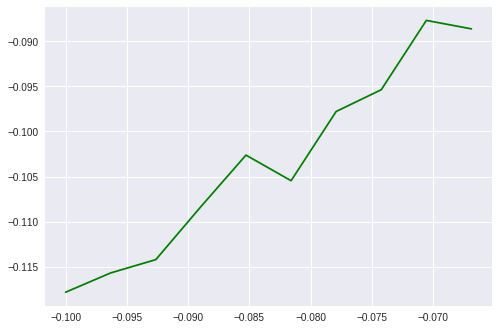

In [14]:
# let's viz the first 10 datapoints of the dataset
plt.plot(train_X[:10], train_Y[:10], 'g')
plt.show()

Loss after epoch 0  is  0.1941911
Loss after epoch 50  is  0.19403192
Loss after epoch 100  is  0.19387293
Loss after epoch 150  is  0.19371411
Loss after epoch 200  is  0.19355547
Loss after epoch 250  is  0.193397
Loss after epoch 300  is  0.19323872
Loss after epoch 350  is  0.19308062
Loss after epoch 400  is  0.19292267
Loss after epoch 450  is  0.19276491
Loss after epoch 500  is  0.19260734
Loss after epoch 550  is  0.19244994
Loss after epoch 600  is  0.1922927
Loss after epoch 650  is  0.19213565
Loss after epoch 700  is  0.19197878
Loss after epoch 750  is  0.19182205
Loss after epoch 800  is  0.1916655
Loss after epoch 850  is  0.19150916
Loss after epoch 900  is  0.19135296
Loss after epoch 950  is  0.19119698
Now testing the model in the test set
The final loss is:  0.82333696


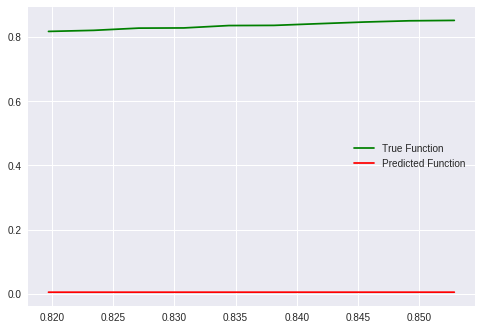

In [15]:
#Creating the placeholders
x = tf.placeholder(tf.float32, name="x")
y = tf.placeholder(tf.float32, name="y")


W = tf.Variable(0.0, name='weight_1')
b = tf.Variable(0.0, name='bias_1')

pred_y = (W*x) + b

loss = tf.reduce_mean(tf.square(y - pred_y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

with tf.Session() as sess:

  sess.run(tf.global_variables_initializer())
  
  for epoch in range(n_epochs):
    _, curr_loss = sess.run([optimizer, loss], feed_dict={x:train_X, y:train_Y})
    
    if epoch % interval == 0:
      print ('Loss after epoch', epoch, ' is ', curr_loss)
    
  print ('Now testing the model in the test set')
  final_preds, final_loss = sess.run([pred_y, loss], feed_dict={x:test_X, y:test_Y})
    
  print ('The final loss is: ', final_loss)
  
  plt.plot(test_X[:10], test_Y[:10], 'g', label='True Function')
  plt.plot(test_X[:10], final_preds[:10], 'r', label='Predicted Function')
  plt.legend()
  plt.show()

Loss after epoch 0  is  0.1922823
Loss after epoch 50  is  0.19212465
Now testing the model in the test set
The final loss is:  0.8234747


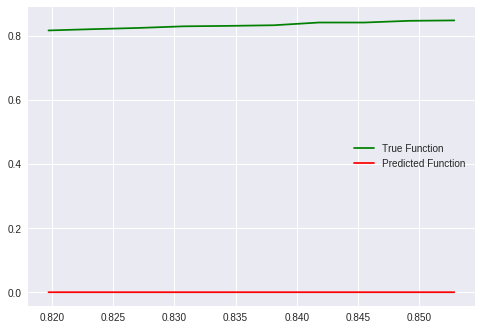

In [17]:
# Create the dataset
X = np.linspace(-30.0, 300.0, 300)
Y = 2 * np.linspace(-30.0, 250.0, 300) + np.random.randn(*X.shape)

# Normalize the dataset
X = X / np.max(X)
Y = Y / np.max(Y)

# Divide it into train and test
train_X = X[:250]
train_Y = Y[:250]

test_X = X[250:]
test_Y = Y[250:]

def linear_regression(learning_rate, n_epochs, interval):  

  #Creating the placeholders
  x = tf.placeholder(tf.float32, name="x")
  y = tf.placeholder(tf.float32, name="y")


  W = tf.Variable(0.0, name='weight_1')
  b = tf.Variable(0.0, name='bias_1')

  pred_y = (W*x) + b

  loss = tf.reduce_mean(tf.square(y - pred_y))

  optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

  with tf.Session() as sess:

    sess.run(tf.global_variables_initializer())

    for epoch in range(n_epochs):
      _, curr_loss = sess.run([optimizer, loss], feed_dict={x:train_X, y:train_Y})

      if epoch % interval == 0:
        print ('Loss after epoch', epoch, ' is ', curr_loss)

    print ('Now testing the model in the test set')
    final_preds, final_loss = sess.run([pred_y, loss], feed_dict={x:test_X, y:test_Y})

    print ('The final loss is: ', final_loss)

    plt.plot(test_X[:10], test_Y[:10], 'g', label='True Function')
    plt.plot(test_X[:10], final_preds[:10], 'r', label='Predicted Function')
    plt.legend()
    plt.show()
    
linear_regression(learning_rate=0.000005, n_epochs=100, interval=50)

Loss after epoch 0  is  0.1922823
Loss after epoch 50  is  0.19121365
Loss after epoch 100  is  0.19015308
Loss after epoch 150  is  0.18910047
Loss after epoch 200  is  0.18805581
Loss after epoch 250  is  0.18701902
Loss after epoch 300  is  0.18599004
Loss after epoch 350  is  0.18496881
Loss after epoch 400  is  0.18395527
Loss after epoch 450  is  0.18294935
Now testing the model in the test set
The final loss is:  0.7930045


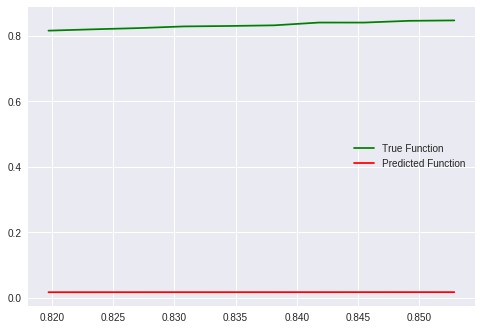

In [19]:
linear_regression(learning_rate=0.000034, n_epochs=500, interval = 50)

Loss after epoch 0  is  0.1922823
Loss after epoch 50  is  0.1922634
Loss after epoch 100  is  0.19224446
Loss after epoch 150  is  0.19222555
Loss after epoch 200  is  0.19220662
Loss after epoch 250  is  0.1921877
Loss after epoch 300  is  0.19216877
Loss after epoch 350  is  0.19214988
Loss after epoch 400  is  0.19213097
Loss after epoch 450  is  0.19211206
Loss after epoch 500  is  0.19209315
Loss after epoch 550  is  0.19207424
Loss after epoch 600  is  0.19205534
Loss after epoch 650  is  0.19203645
Loss after epoch 700  is  0.19201757
Loss after epoch 750  is  0.19199866
Loss after epoch 800  is  0.19197978
Loss after epoch 850  is  0.19196089
Loss after epoch 900  is  0.19194202
Loss after epoch 950  is  0.19192313
Now testing the model in the test set
The final loss is:  0.823285


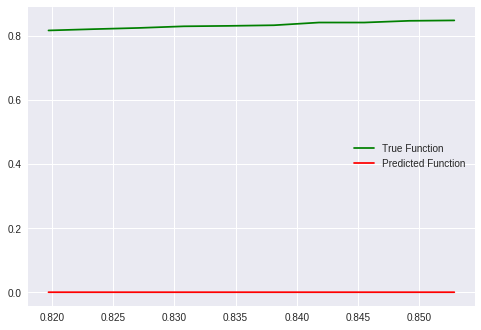

In [20]:
linear_regression(learning_rate=0.0000006, n_epochs=1000, interval=50)